[notion노트정리](https://www.notion.so/Minpy-e111418942f647c693c48ac4e2d0bf9b)

In [6]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 20s 32ms/step - loss: 0.3920 - accuracy: 0.8890 - val_loss: 0.1126 - val_accuracy: 0.9655
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0896 - accuracy: 0.9732 - val_loss: 0.0742 - val_accuracy: 0.9760
Epoch 3/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0530 - accuracy: 0.9848 - val_loss: 0.0666 - val_accuracy: 0.9775
Epoch 4/10
600/600 [==============================] - 12s 20ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0630 - val_accuracy: 0.9801
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0660 - val_accuracy: 0.9809
Epoch 7/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0673 - val_accuracy:

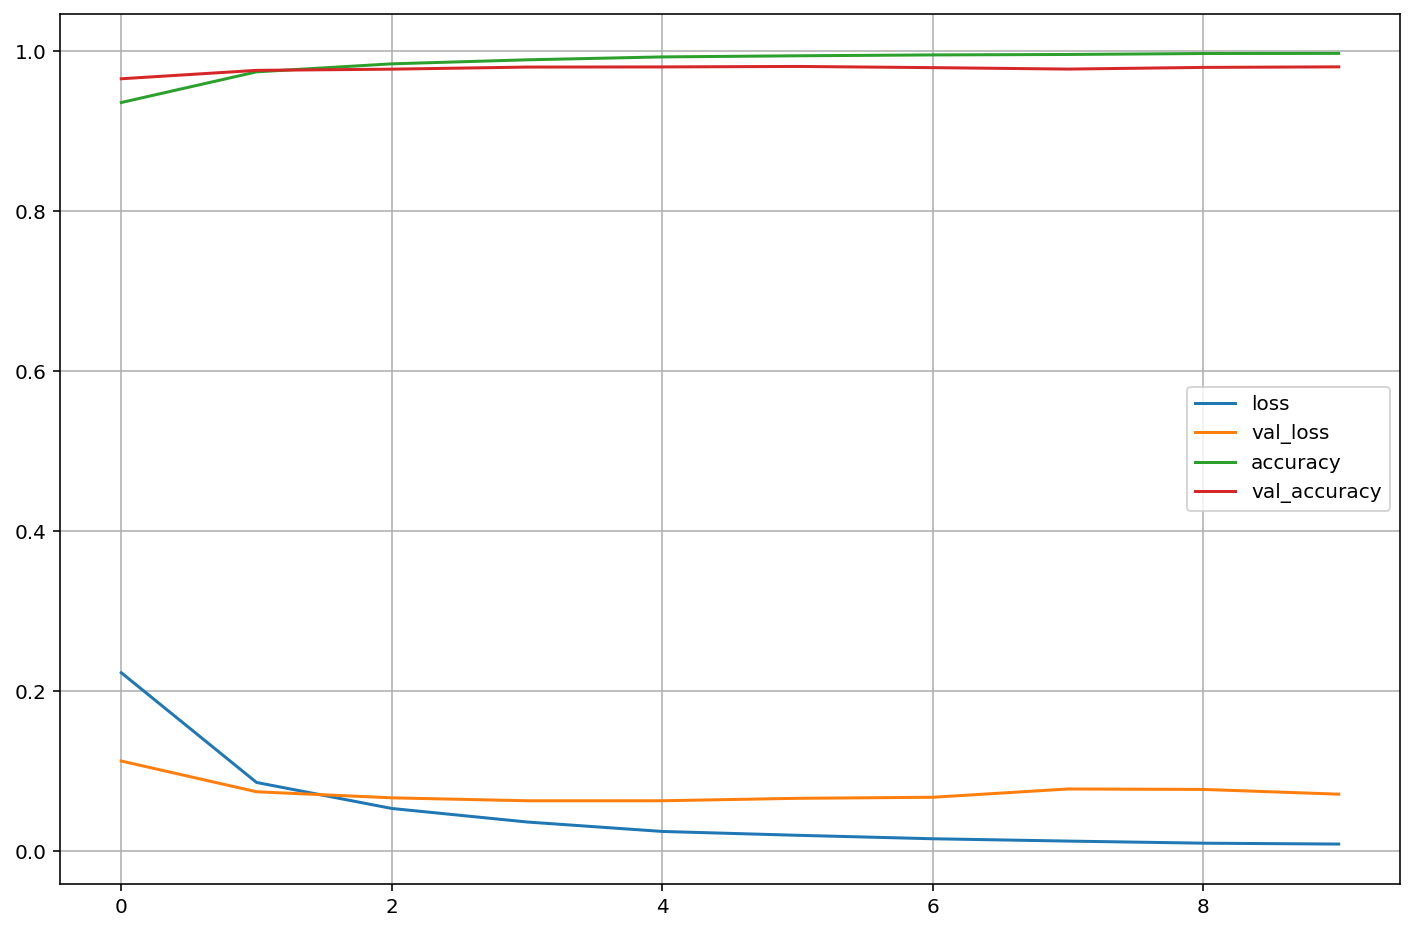

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()


In [11]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0712 - accuracy: 0.9804
Test loss :  0.07122281938791275
Test accuracy :  0.980400025844574


In [12]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [15]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

196

In [16]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[3902,
 2369,
 5981,
 5981,
 4956,
 6597,
 247,
 5734,
 7154,
 1395,
 3597,
 3629,
 3422,
 2743,
 3533,
 1901]

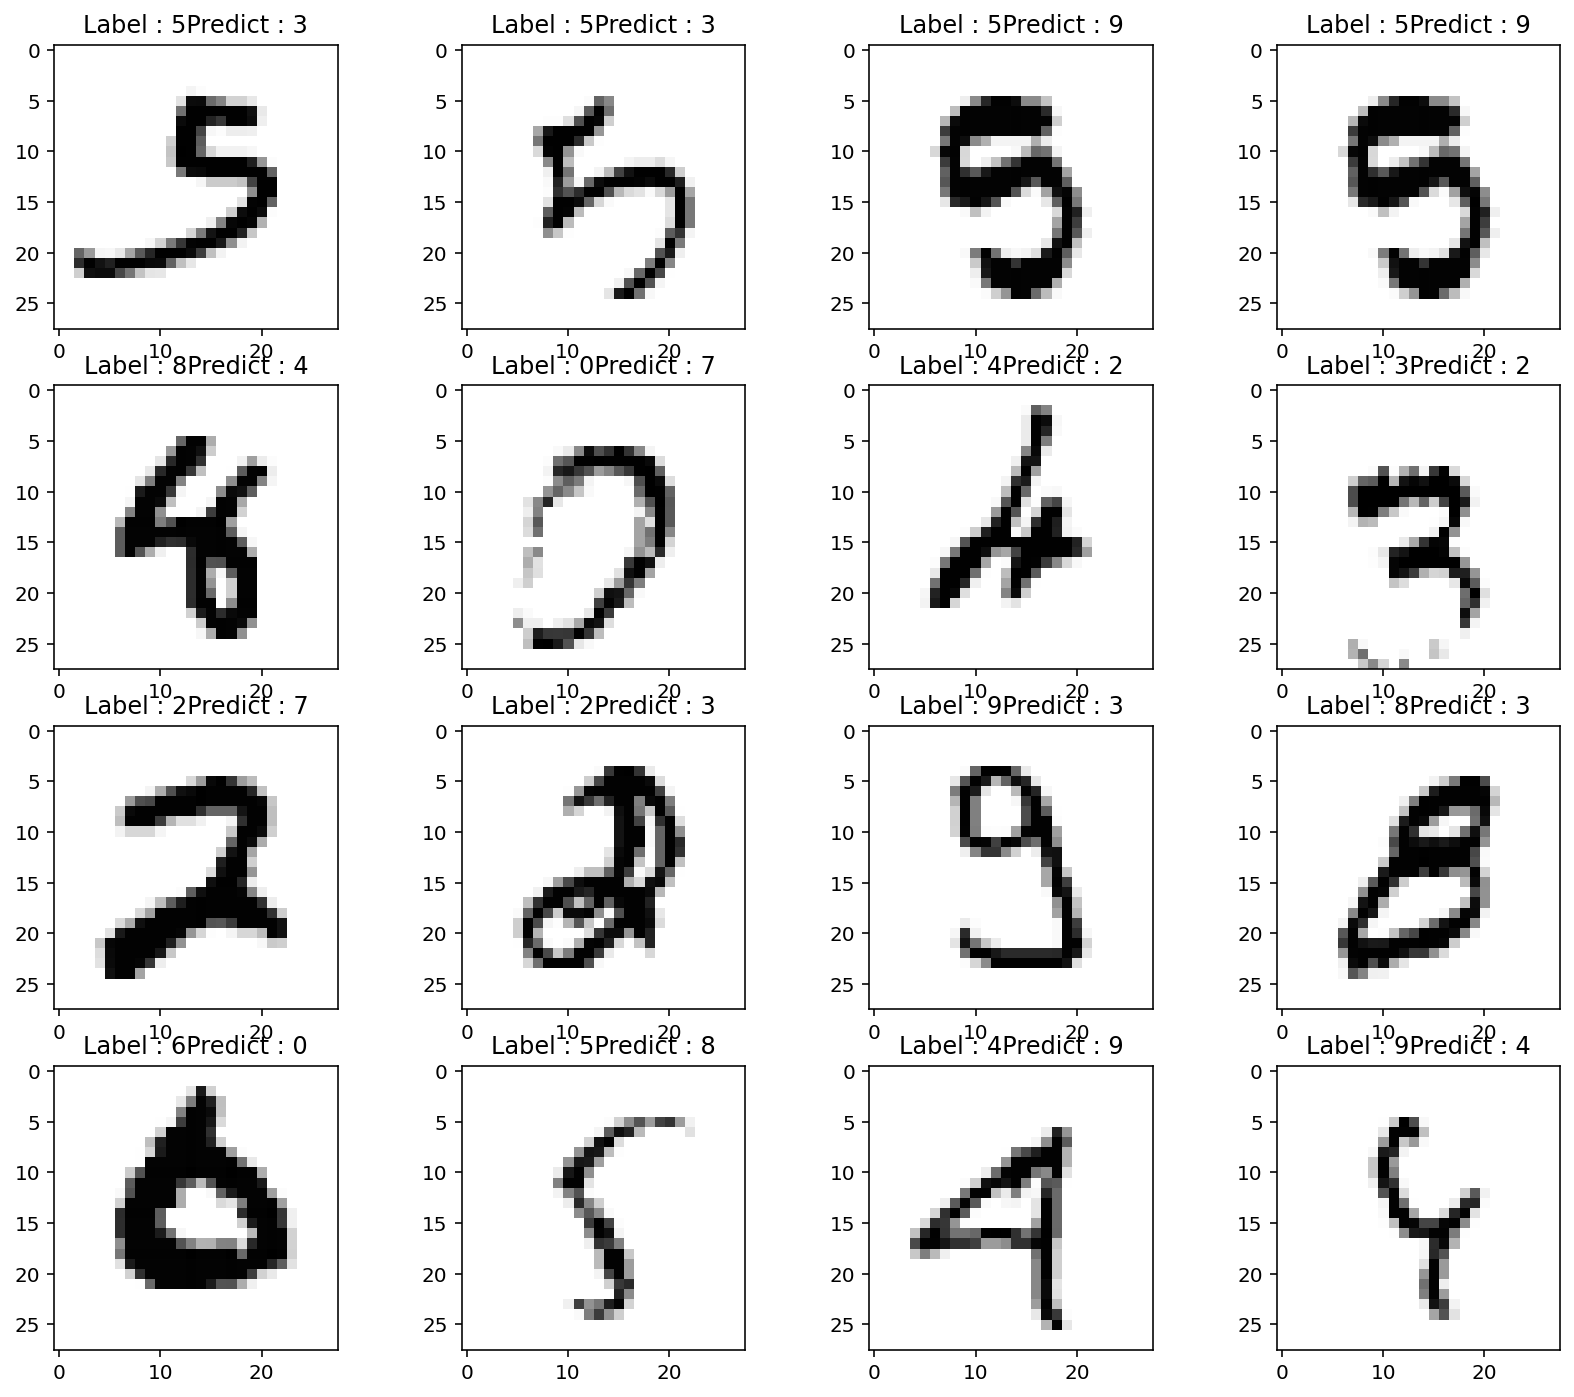

In [17]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + 'Predict : ' + str(predicted_labels[n]))
    
plt.show()

In [18]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4423680/4422102 [==============================] - 1s 0us/step


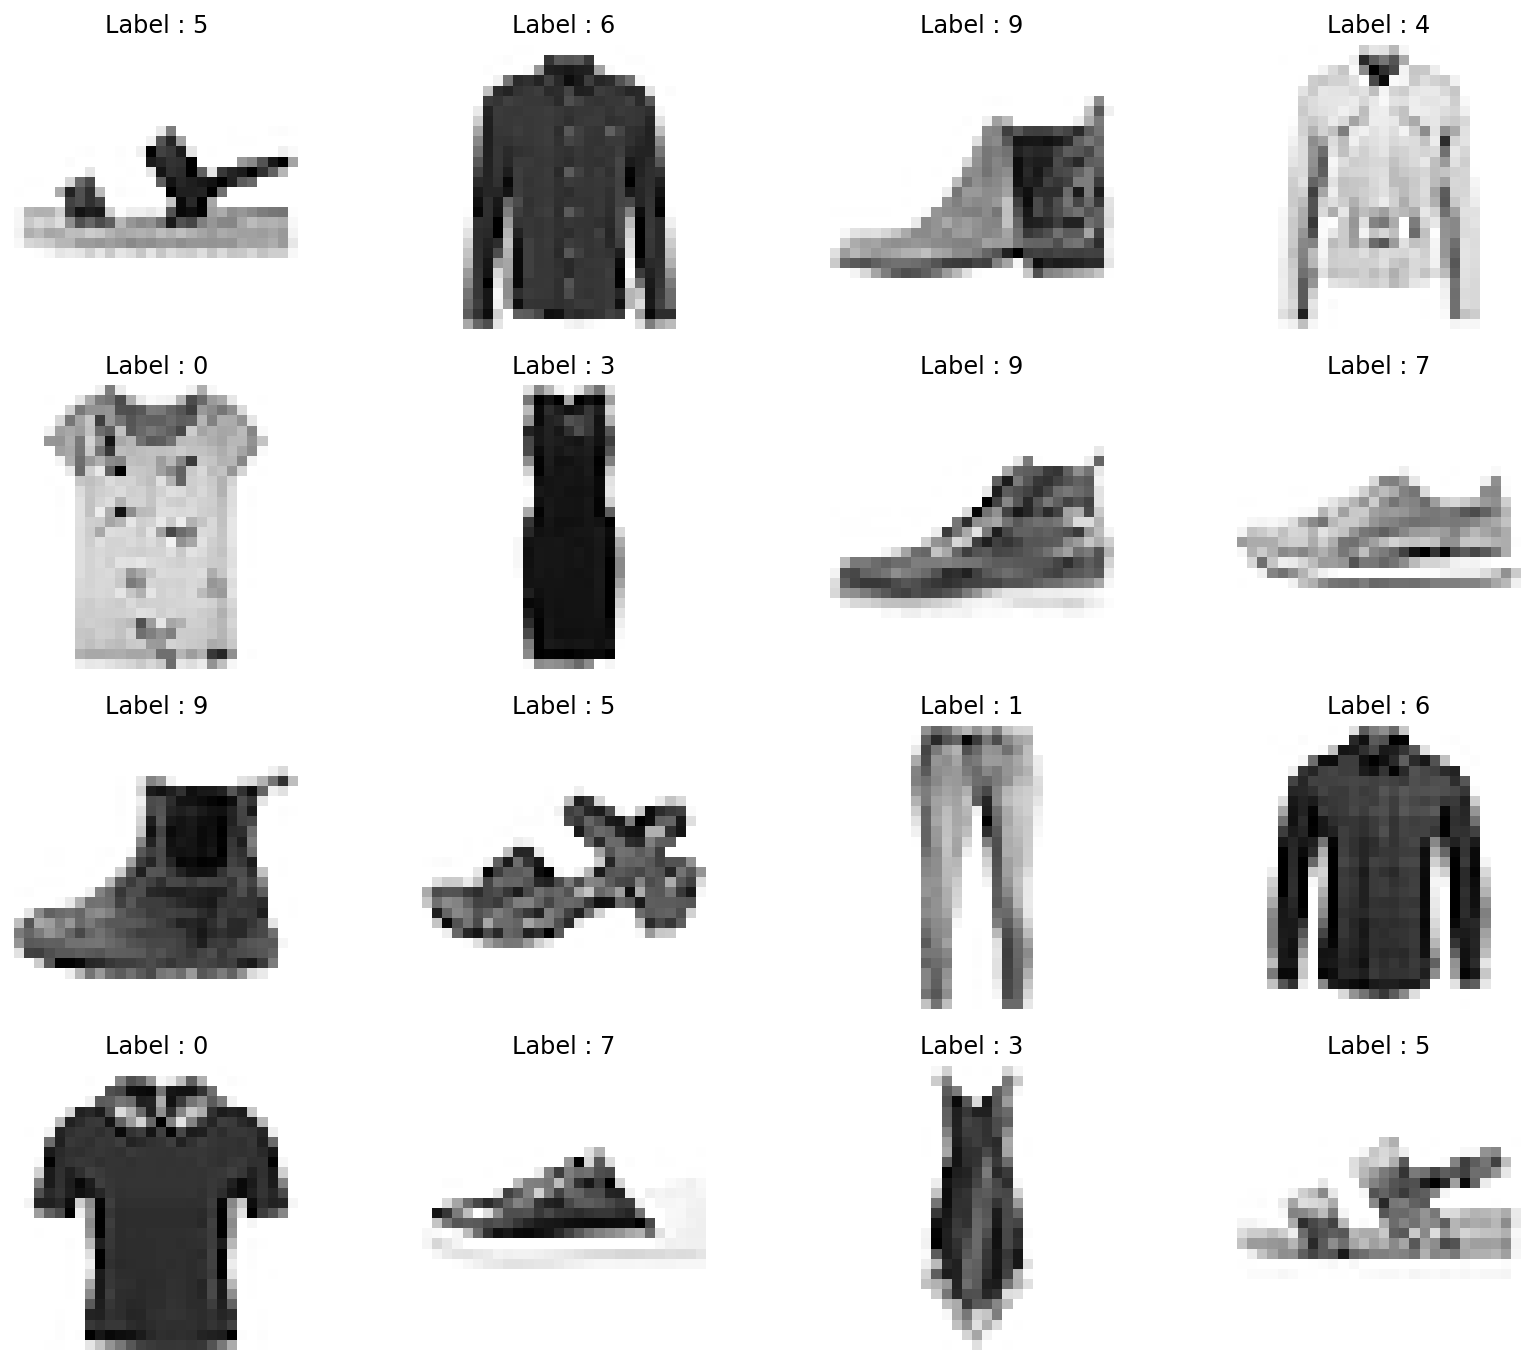

In [20]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(y_train)), k=16)
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
    
plt.show()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 12s 19ms/step - loss: 0.6239 - accuracy: 0.7827 - val_loss: 0.4169 - val_accuracy: 0.8530
Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.3737 - accuracy: 0.8658 - val_loss: 0.3687 - val_accuracy: 0.8635
Epoch 3/10
600/600 [==============================] - 12s 19ms/step - loss: 0.3247 - accuracy: 0.8796 - val_loss: 0.3712 - val_accuracy: 0.8661
Epoch 4/10
600/600 [==============================] - 12s 20ms/step - loss: 0.3048 - accuracy: 0.8880 - val_loss: 0.3382 - val_accuracy: 0.8777
Epoch 5/10
600/600 [==============================] - 11s 18ms/step - loss: 0.2744 - accuracy: 0.8983 - val_loss: 0.3250 - val_accuracy: 0.8826
Epoch 6/10
600/600 [==============================] - 11s 19ms/step - loss: 0.2643 - accuracy: 0.9020 - val_loss: 0.3413 - val_accuracy: 0.8757
Epoch 7/10
600/600 [==============================] - 11s 19ms/step - loss: 0.2501 - accuracy: 0.9059 - val_loss: 0.3441 - val_accuracy:

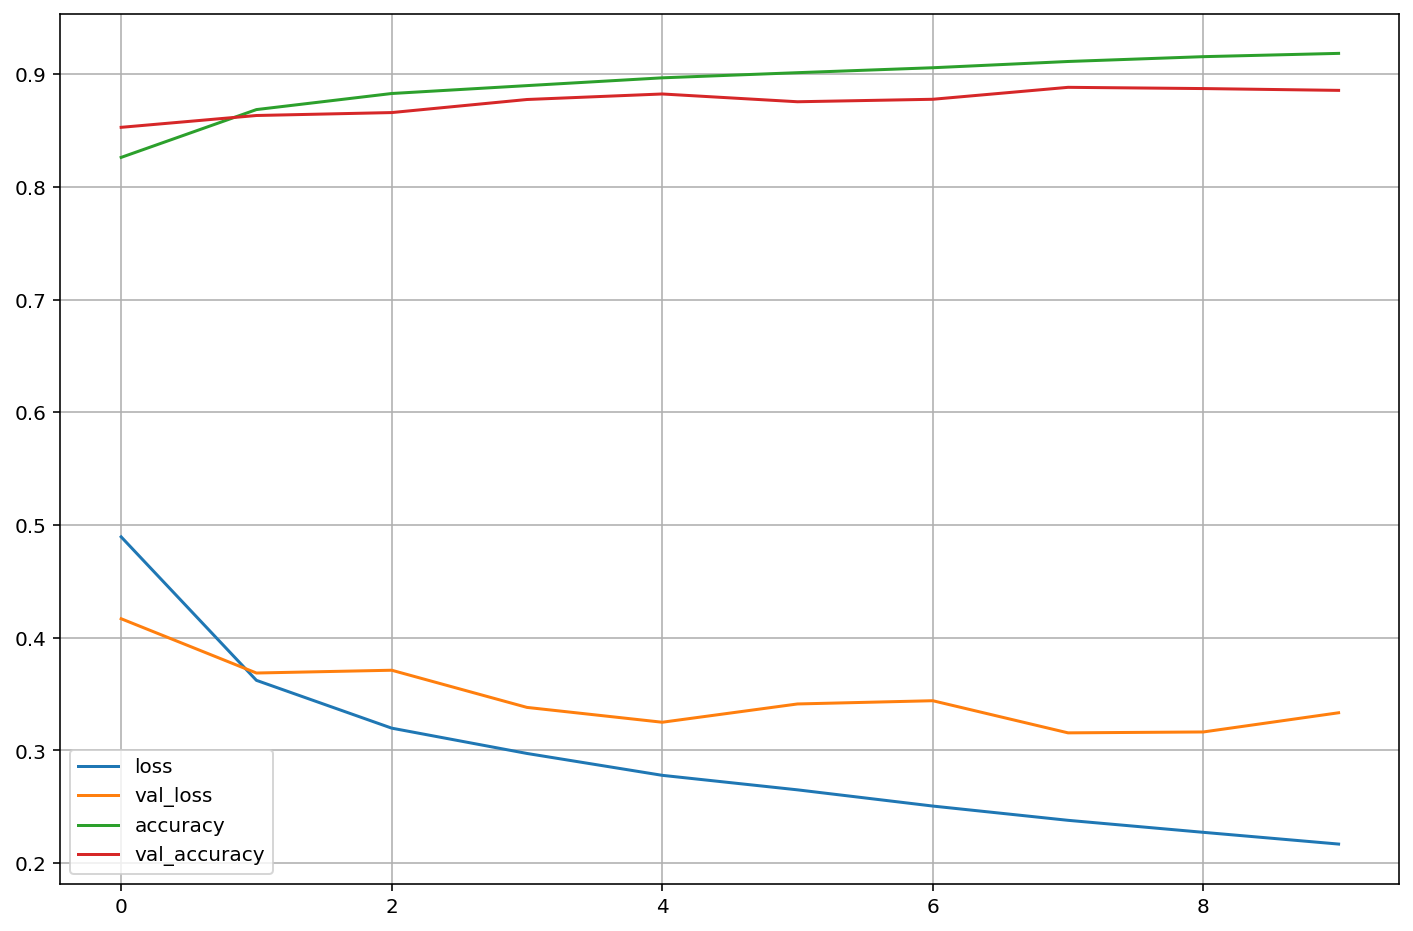

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [27]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.3335 - accuracy: 0.8858
Test loss : 0.3334523141384125
Test accuracy :  0.8858000040054321


In [28]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [29]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
    
len(wrong_result)

1142

In [30]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[5334,
 6003,
 979,
 2042,
 1396,
 3731,
 49,
 8217,
 7924,
 6297,
 5327,
 881,
 8004,
 7876,
 8536,
 8433]

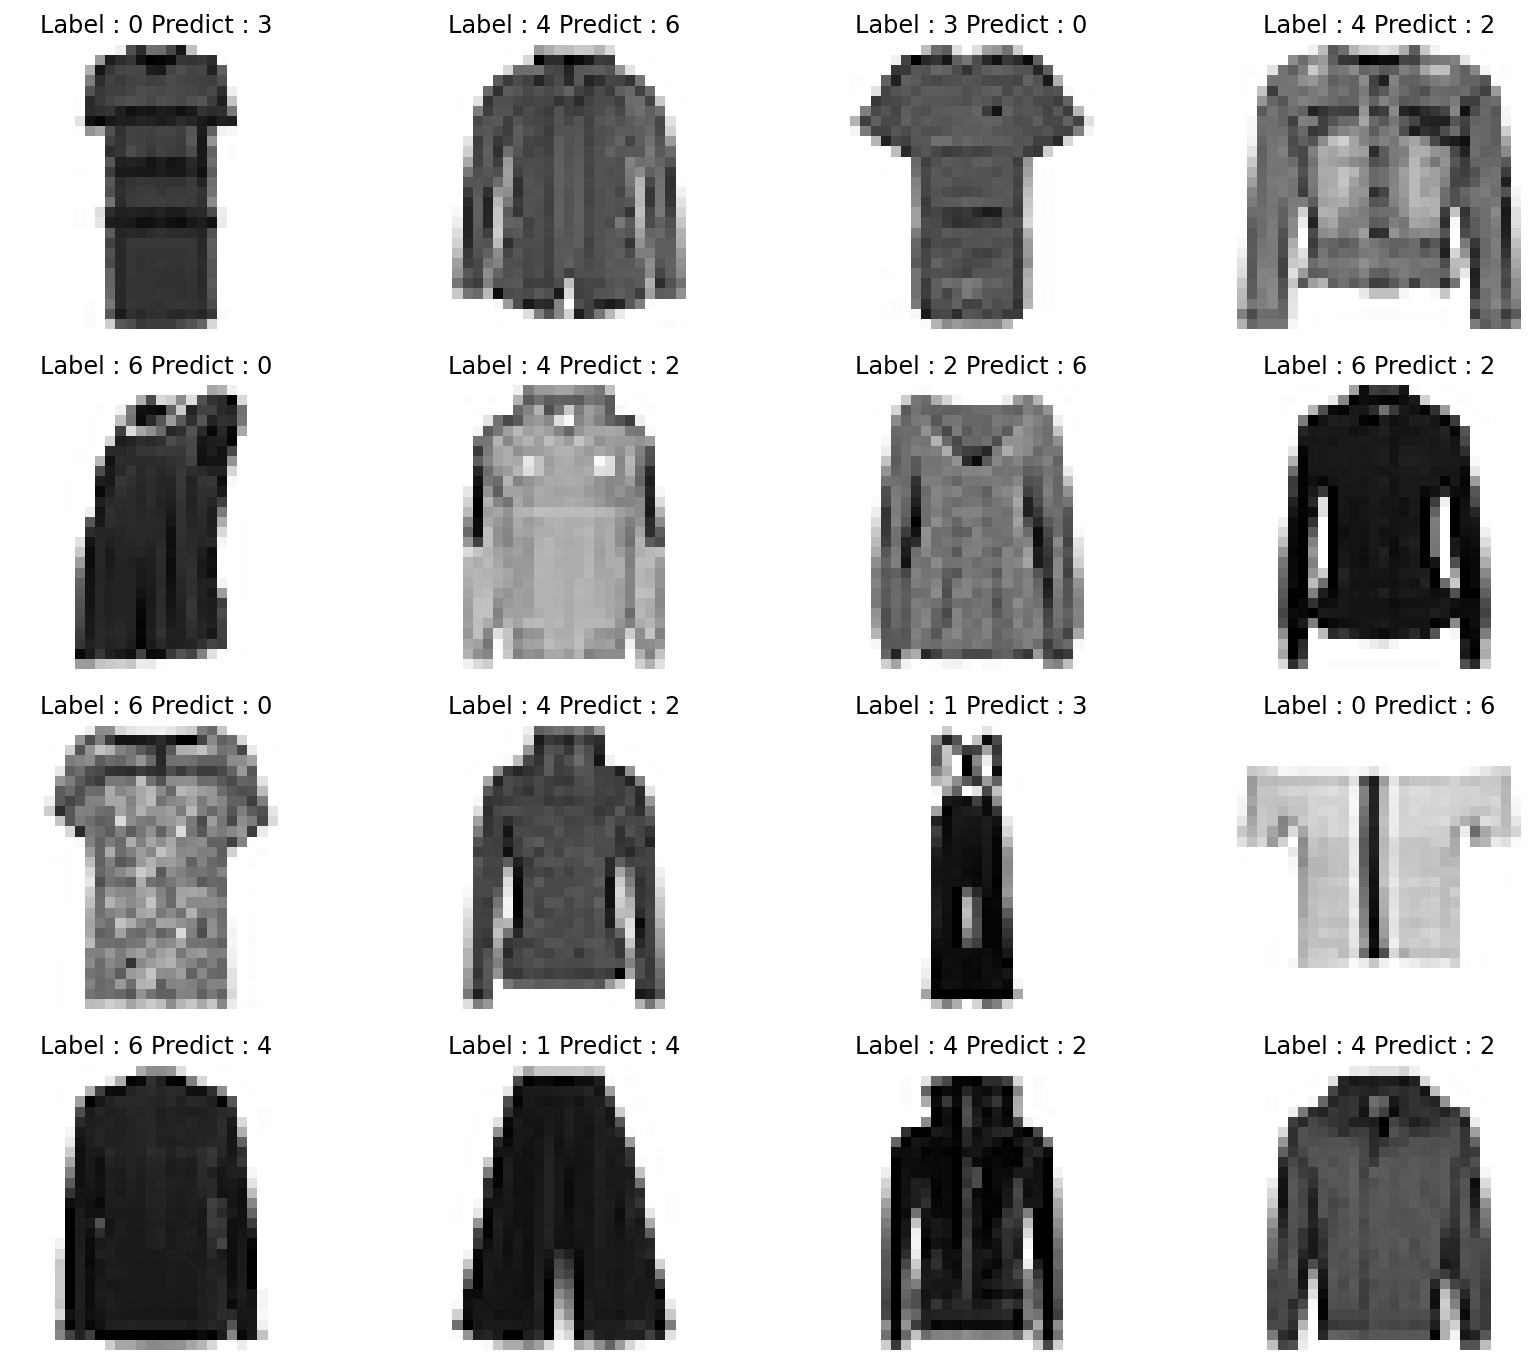

In [31]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()